<a href="https://colab.research.google.com/gist/bedohazizsolt/623636c1e881c260d520d33c13376907/HW_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised learning introduction, K-Nearest Neighbors (KNN)

Your task will be to predict wine quality from physicochemical features with the help of the 
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will have to do it both as a regression and classification task. 


-------

###1. Read data
  - Read the provided winequality-red.csv file. 
  - Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.  
  - Use all columns except the last as features and the quality column as target. 
  - Make 80-20% train test split (use sklearn).
  - Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*
  - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

----

###2. KNN regression
- Implement naive K nearest neighbour regression as a function only using python and numpy. The signature of the function should be:
```python
def knn_regression(x_test, x_train, y_train, k=20):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
```
- Use Euclidean distance as a measure of distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

### 3. Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
```python
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    """Return prediction with weighted knn regression."""
    ...
    return y_pred
```
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

### 4. KNN classification
- Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
```python
def knn_classifier(X_train, y_train, X_test, k=20):
  """Return prediction with knn classification."""
    ...
    return y_pred
```

- Make prediction with k=20 for the test set using the training data.

-----

### 5. Compare the models
- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. 
You can run it for any model you implented. The predictions should be the same as yours. Some help:
  ```python
  from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
  knn= KNeighborsRegressor(20, weights="distance")
  #knn= KNeighborsClassifier(20, weights="uniform")
  knn.fit(X_train, y_train)
  knn.predict(X_test)
  ```
- Write down your observations.
----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

### Task 1

In [3]:
data=pd.read_csv("winequality-red.csv", sep=";")

In [4]:
data.isna().any() #searching for missing datas

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
data.dtypes #making sure its all numerical datas

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.duplicated().any() #i found duplication, so we are going to drop them.


True

In [7]:
data.drop_duplicates(inplace=True) 

In [8]:
#Now i am going to prepare the train, and test sets 
from sklearn.model_selection import train_test_split


features = data.iloc[::,:-1] .values
target = data["quality"]


X_train,X_test,y_train,y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [9]:
X_test=(X_test-X_train.mean(0))/X_train.std(0)
X_train=(X_train-X_train.mean(0))/X_train.std(0)

In [10]:
# creating a one-hot encoded version of y_test and y_train

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values # we use values beacuse it gives back a numpy array

### Task 2

In [11]:
def knn_regression(x_test, x_train, y_train, k=20):
    """Return prediction with knn regression."""
    y_pred = np.zeros(len(x_test))

    for i, x_test_point in enumerate(x_test):
        # Calculate the euclidean distances between x_test_point and all x_train points
        distances = np.sqrt(np.sum((x_train - x_test_point)**2, axis=1))
    
       # Find indices of k-nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Calculate the predicted value as the mean of the k-nearest neighbors y values - without weights
        y_pred[i] = np.mean(y_train.iloc[k_nearest_indices])

    return y_pred

    #source: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [12]:
y_pred1 = knn_regression(X_test, X_train, y_train, k=20)


Text(0.5, 1.0, 'KNN regression')

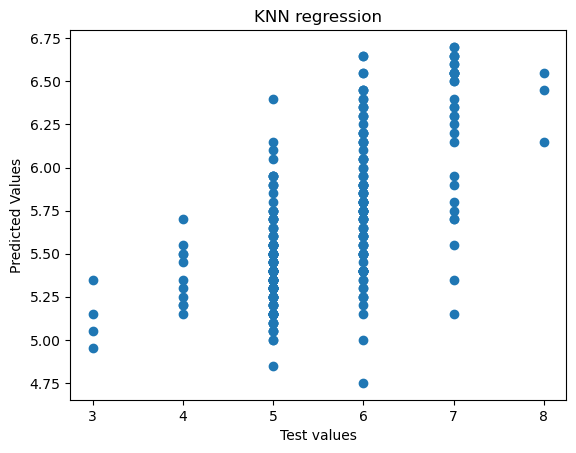

In [13]:
scatter(y_test, y_pred1)
xlabel('Test values')
ylabel('Predicted Values')
title('KNN regression')

### Task 3

In this task i am going to add weights to each neighbours, that is inversely proportional to the distance

In [14]:
def knn_regression_weights(x_test, x_train, y_train, k=20):
    """Return prediction with knn regression."""
    y_pred = np.zeros(len(x_test))

    for i, x_test_point in enumerate(x_test):
        # Calculate the euclidean distances between x_test_point and all x_train points
        distances = np.sqrt(np.sum((x_train - x_test_point)**2, axis=1))
    
       # Find indices of k-nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Calculating the predicted value as the mean of the k-nearest neighbors y values - with weights
        y_pred[i] = np.average(y_train.iloc[k_nearest_indices], weights=1 / distances[k_nearest_indices])


    return y_pred

Text(0.5, 1.0, 'Weighted KNN regression')

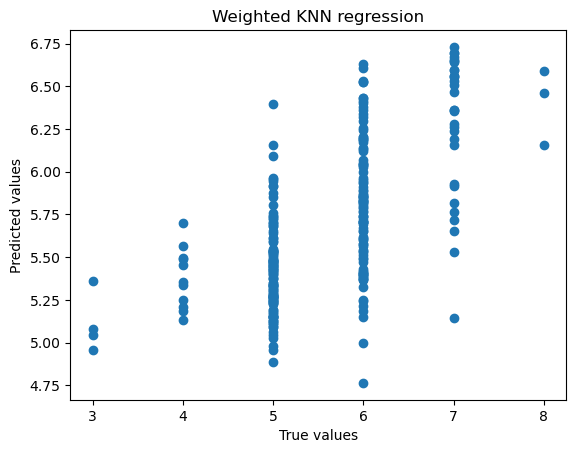

In [15]:
y_pred2 = knn_regression_weights(X_test, X_train, y_train, k=20)

scatter(y_test, y_pred2)
xlabel('True values')
ylabel('Predicted values')
title('Weighted KNN regression')

### Task 4

In [16]:
def knn_classifier(X_train, y_train, X_test, k=20):
    """Return prediction with knn classification."""
    y_pred = np.zeros((len(X_test), y_train.shape[1]))  # initialize an array for predictions

    for i, x_test_point in enumerate(X_test):
        # calculate L2 distances between x_test_point and all x_train points
        distances = np.sqrt(np.sum((X_train - x_test_point)**2, axis=1))

        # find indices of k-nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # count the occurrences of each class in the k-nearest neighbors
        class_counts = np.sum(y_train[k_nearest_indices], axis=0)

        # calculate the prediction for each class
        y_pred[i] = class_counts / k

    return y_pred


In [17]:
y_pred3 = knn_classifier(X_train, y_train_onehot, X_test, k=20)

In [18]:
print("Predicted Probabilities:\n", y_pred3[:5])

Predicted Probabilities:
 [[0.   0.   0.75 0.25 0.   0.  ]
 [0.   0.   0.15 0.75 0.1  0.  ]
 [0.   0.   0.05 0.4  0.5  0.05]
 [0.05 0.05 0.55 0.25 0.1  0.  ]
 [0.   0.15 0.25 0.6  0.   0.  ]]


### Task 5

In [19]:

print("Accuracy of KNN regression: ", sum(around(y_pred1)==y_test)/len(y_test)) #basically it checks the proportion of correct predicts, compared to all of the test data.  
print("Accuracy of weighted KNN regression: ", sum(around(y_pred2)==y_test)/len(y_test))
print("Accuracy of KNN classification: ", sum(np.argmax(y_pred3, axis=1)==np.argmax(y_test_onehot, axis=1))/len(y_test))
print("Baseline: ", sum(around([y_train.mean()]*len(y_test))==y_test)/len(y_test))

Accuracy of KNN regression:  0.6029411764705882
Accuracy of weighted KNN regression:  0.6286764705882353
Accuracy of KNN classification:  0.6066176470588235
Baseline:  0.3786764705882353


This accuracy calculation was written by one of the tutors of the course, i just copied it out, to learn from it and understand it.